<a href="https://colab.research.google.com/github/annefrancine/Time-series/blob/master/italy_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains data about the earthquakes that hit the center of Italy between August and November 2016
Dataset : https://www.kaggle.com/blackecho/italy-earthquakes

In [0]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/curso series temporais (udemy)/Dados/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')
##set time as an index

In [0]:
#type
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [0]:
df.index = pd.to_datetime(df.index) #convert Time to date time
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [0]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


In [0]:
#filtering the data
depth_magn = df.where((df["Magnitude"] >= 3.0)).dropna()[["Magnitude", "Depth/Km"]]
dm = depth_magn.groupby(depth_magn.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


# Dataviz

In [0]:
plt.figure();

<Figure size 432x288 with 0 Axes>

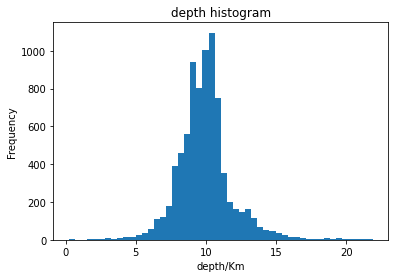

In [0]:
#Histogram
depth = df[(df["Depth/Km"] < 22) & (df["Depth/Km"] >= 0)]["Depth/Km"]
depth.plot(kind="hist", stacked=True, bins=50)
plt.title("depth histogram")
plt.xlabel("depth/Km");

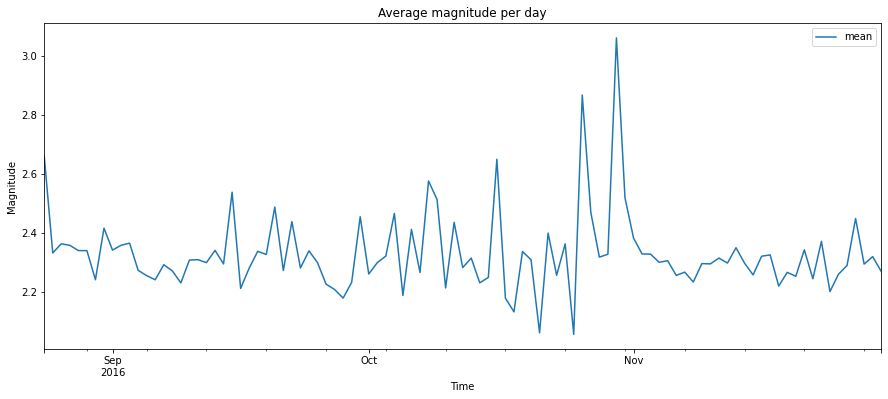

In [0]:
#line chart
df["Magnitude"].resample("D").apply([np.mean]).plot()
plt.title("Average magnitude per day")
plt.ylabel("Magnitude");

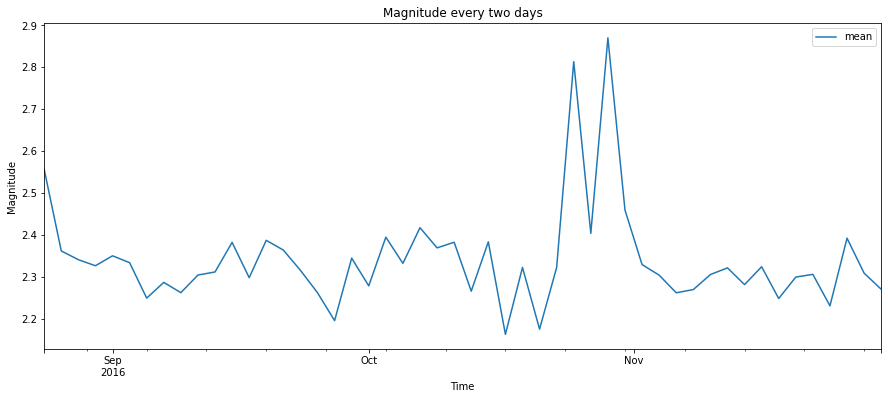

In [0]:
df["Magnitude"].resample("2D").apply([np.mean]).plot()
plt.title("Magnitude every two days")
plt.ylabel("Magnitude");

In [0]:
magn3 = df.loc[df["Magnitude"] >= 3.0, "Magnitude"]

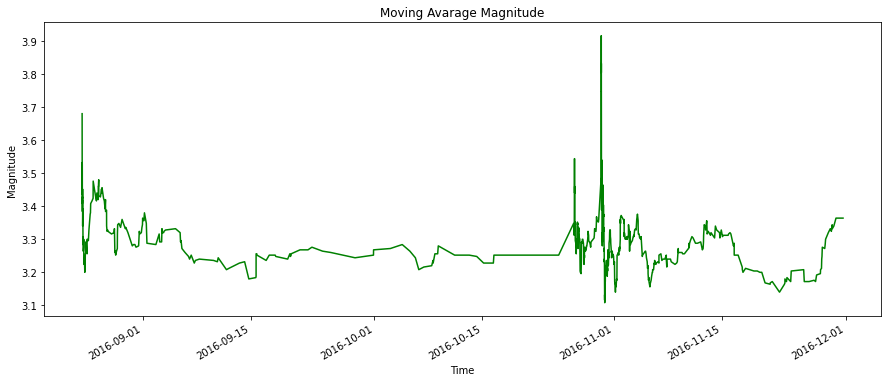

In [0]:
pd.Series.rolling(magn3, window=25).mean().plot(style="-g")
plt.title("Moving Avarage Magnitude")
plt.ylabel("Magnitude")
plt.xlabel("Time");

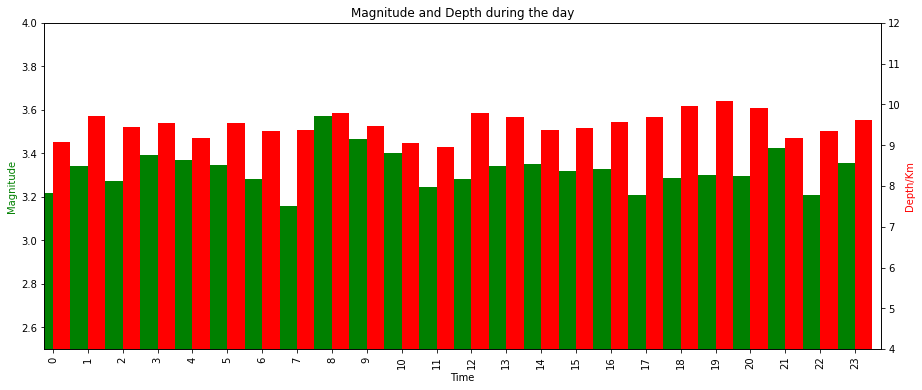

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("hour day")
ax.yaxis.label.set_color("green")
ax2 = ax.twinx()
ax2.set_ylim([4.0, 12])
ax2.set_ylabel("Depth/Km")
ax2.set_xlabel("hour day")
ax2.yaxis.label.set_color("red")

width = 0.5

dm["Magnitude"].plot(kind="bar", color='green', ax=ax, width=width, position=1)
dm["Depth/Km"].plot(kind="bar", color="red", ax=ax2, width=width, position=0)
plt.grid(False)
plt.title("Magnitude and Depth during the day");